In [1]:
import pandas as pd
import geopandas as gpd
from sklearn.neighbors import KDTree
import numpy as np

#### Read Hexagon Layer in

In [2]:
hexagons_path=r"C:\Users\User\Documents\EHI\Projects\VAR Modelling\Data Mgmt\hexagons\hexagons.shp"
hexagons = gpd.read_file(hexagons_path)
hexagons["geometry"].crs

<Geographic 2D CRS: EPSG:4757>
Name: SVY21
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Singapore
- bounds: (103.59, 1.13, 104.07, 1.47)
Datum: SVY21
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [3]:
hexagons.head()

OBJECTID  TARGET_FID                                           centroid  \
0         1           0  { "type": "Point", "coordinates": [ 103.674855...   
1         2           1  { "type": "Point", "coordinates": [ 103.678899...   
2         3           2  { "type": "Point", "coordinates": [ 103.691040...   
3         4           3  { "type": "Point", "coordinates": [ 103.840759...   
4         5           4  { "type": "Point", "coordinates": [ 104.018803...   

  cell_id  friendly_n  Shape_Leng  Shape_Area  cell_id_1        X    Y  \
0     463   GUL BASIN    0.016238    0.000019        463  103.675  0.0   
1     514       SAFTI    0.016238    0.000019        514  103.679  0.0   
2     634    SHIPYARD    0.016238    0.000019        634  103.691  0.0   
3    2410       OXLEY    0.016238    0.000019       2410  103.841  0.0   
4    3717  CHANGI BAY    0.016238    0.000019       3717  104.019  0.0   

                                            geometry  
0  POLYGON ((103.67216 1.29272, 103.67351 1.29507...  
1  POLYGON ((103.67620 1.33270, 103.67755 1.33505...  
2  POLYGON ((103.68834 1.30213, 103.68969 1.30448...  
3  POLYGON ((103.83806 1.29508, 103.83941 1.29743...  
4  POLYGON ((104.01611 1.31388, 104.01745 1.31623...

#### Read Dengue Data

In [4]:
dbf = pd.read_csv("DEN-Hexagon DBF 2013_2020_complete.csv")

In [5]:
dbf.head()

CASE_ID  CLUSTER_ID  Onset_EYear  Onset_EWeek Clean_Onset  \
0  DENF-2013-000025           0         2012           51  17/12/2012   
1  DENF-2013-000018    20130008         2012           51  21/12/2012   
2  DENF-2013-000048           0         2012           51  22/12/2012   
3  DENF-2013-000109           0         2012           51  22/12/2012   
4  DENF-2013-000017           0         2012           51  20/12/2012   

   ONSET_DATE  NEA_ONSET_  NOTIFY_DAT  POSTAL     X output     Y output  \
0  17/12/2012  17/12/2012  31/12/2012  650536  18857.18765  37512.04877   
1  31/12/2012  21/12/2012  31/12/2012  536467  32943.97740  36955.30429   
2  30/12/2012  22/12/2012    3/1/2013  550421  32663.67780  36774.03736   
3    3/1/2013  22/12/2012    4/1/2013  550422  32750.05966  36774.55328   
4  28/12/2012  20/12/2012    1/1/2013  534969  33192.61720  36691.75100   

   cell_id        friendly_n  Shape_Leng  Shape_Area  
0     1334    HONG KAH NORTH    0.016238    0.000019  
1     2826  UPPER PAYA LEBAR    0.016238    0.000019  
2     2826  UPPER PAYA LEBAR    0.016238    0.000019  
3     2826  UPPER PAYA LEBAR    0.016238    0.000019  
4     2861          TAI SENG    0.016238    0.000019

#### Strange cells with only 1 case from 2013 to 2020

There are strangely 126 CELLS with only 1 case from 2013 to 2020. Out of 1563 CELLS

In [6]:
dbf_counts = dbf.groupby(["cell_id"])["CASE_ID"].size().sort_values().reset_index()

In [7]:
dbf_single = dbf_counts[dbf_counts["CASE_ID"]==1]

In [8]:
dbf_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1563 entries, 0 to 1562
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   cell_id  1563 non-null   int64
 1   CASE_ID  1563 non-null   int64
dtypes: int64(2)
memory usage: 24.5 KB


In [9]:
hexagons["cell_id"]=hexagons["cell_id"].astype(int)

<AxesSubplot:ylabel='friendly_n'>

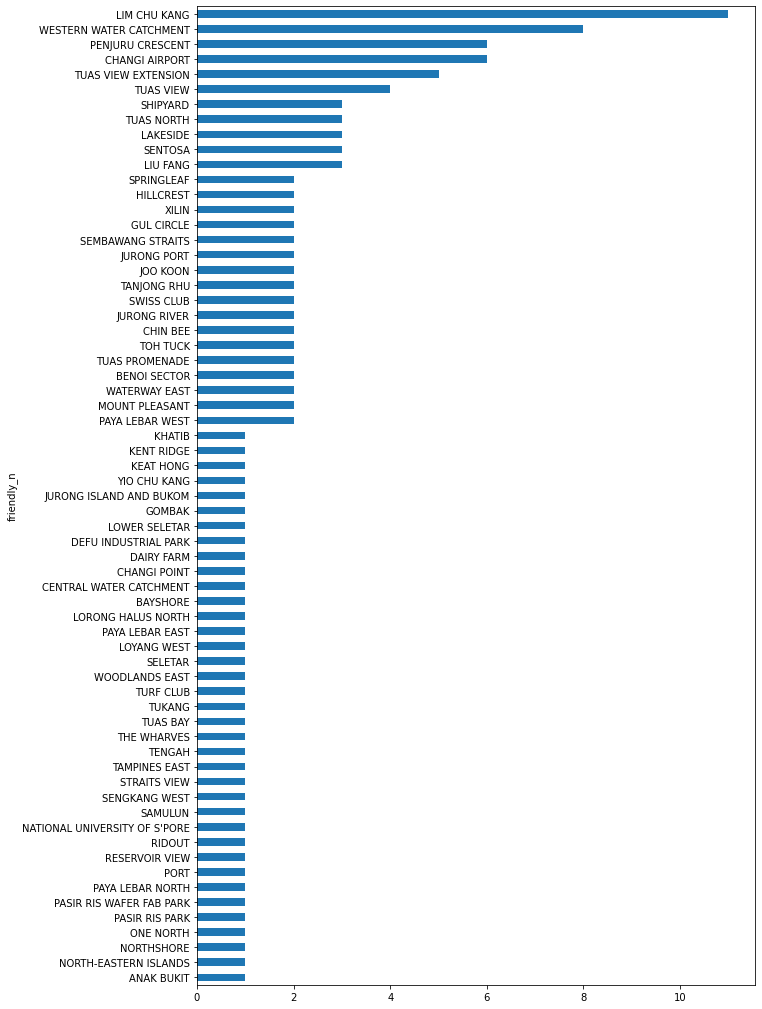

In [10]:
hexagons[hexagons["cell_id"].isin(dbf_single["cell_id"])].groupby("friendly_n").size().sort_values(ascending=True).\
plot(kind="barh",figsize=(10,18))

#### Hexagons Needed

In [11]:
hexagons["cell_id"]=hexagons["cell_id"].astype(int)

In [12]:
hx_need = hexagons[hexagons["cell_id"].isin(dbf["cell_id"])]

In [13]:
hx_need["centroid"] = hx_need["geometry"].centroid

C:\Users\User\Anaconda3\envs\branch-env\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.
C:\Users\User\Anaconda3\envs\branch-env\lib\site-packages\geopandas\geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [14]:
hx_need.head()

OBJECTID  TARGET_FID                   centroid  cell_id  \
3          4           3  POINT (103.84076 1.29508)     2410   
20        21          20  POINT (103.61012 1.24569)       15   
32        33          32  POINT (103.61416 1.23864)       27   
34        35          34  POINT (103.61416 1.24804)       29   
76        77          76  POINT (103.62225 1.27626)       71   

             friendly_n  Shape_Leng  Shape_Area  cell_id_1        X    Y  \
3                 OXLEY    0.016238    0.000019       2410  103.841  0.0   
20  TUAS VIEW EXTENSION    0.016238    0.000019         15  103.610  0.0   
32  TUAS VIEW EXTENSION    0.016238    0.000019         27  103.614  0.0   
34  TUAS VIEW EXTENSION    0.016238    0.000019         29  103.614  0.0   
76  TUAS VIEW EXTENSION    0.016238    0.000019         71  103.622  0.0   

                                             geometry  
3   POLYGON ((103.83806 1.29508, 103.83941 1.29743...  
20  POLYGON ((103.60742 1.24569, 103.60877 1.24804...  
32  POLYGON ((103.61147 1.23864, 103.61281 1.24099...  
34  POLYGON ((103.61147 1.24804, 103.61281 1.25039...  
76  POLYGON ((103.61956 1.27626, 103.62090 1.27861...

In [15]:
hx_need.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1563 entries, 3 to 3742
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    1563 non-null   int64   
 1   TARGET_FID  1563 non-null   int64   
 2   centroid    1563 non-null   geometry
 3   cell_id     1563 non-null   int32   
 4   friendly_n  1563 non-null   object  
 5   Shape_Leng  1563 non-null   float64 
 6   Shape_Area  1563 non-null   float64 
 7   cell_id_1   1563 non-null   int64   
 8   X           1563 non-null   float64 
 9   Y           1563 non-null   float64 
 10  geometry    1563 non-null   geometry
dtypes: float64(4), geometry(2), int32(1), int64(3), object(1)
memory usage: 140.4+ KB


In [21]:
hx_need.reset_index(drop=True,inplace=True)

In [22]:
hx_need_x = hx_need.centroid.x.values
hx_need_y  = hx_need.centroid.y.values

C:\Users\User\Anaconda3\envs\branch-env\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.
C:\Users\User\Anaconda3\envs\branch-env\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


#### KDTree KNN

Give 6 neighbours since hexagon with 6 sides

In [16]:
X=np.vstack((hx_need.centroid.x.values, hx_need.centroid.y.values)).T

C:\Users\User\Anaconda3\envs\branch-env\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


In [17]:
tree=KDTree(X, leaf_size=2)

In [18]:
dist, ind = tree.query(X, k=7)  

In [19]:
ind

array([[   0,  846,  920, ...,  921,  884,  885],
       [   1,    3,    2, ...,    4,   26,   17],
       [   2,    1,    3, ...,   16,    4,   27],
       ...,
       [1560, 1561, 1557, ..., 1558, 1553, 1559],
       [1561, 1560, 1557, ..., 1558, 1559, 1553],
       [1562, 1556, 1554, ..., 1546, 1547, 1559]], dtype=int64)

In [20]:
dist

array([[0.        , 0.00468001, 0.00468001, ..., 0.00468001, 0.0047027 ,
        0.0047027 ],
       [0.        , 0.00467991, 0.00813213, ..., 0.03288949, 0.033798  ,
        0.03665635],
       [0.        , 0.00813213, 0.00940533, ..., 0.03668251, 0.0384819 ,
        0.04066077],
       ...,
       [0.        , 0.0046801 , 0.00468011, ..., 0.00813227, 0.01689941,
        0.0188107 ],
       [0.        , 0.0046801 , 0.00936021, ..., 0.01240803, 0.01694948,
        0.01872037],
       [0.        , 0.02472994, 0.02842259, ..., 0.03709502, 0.04466851,
        0.04480146]])

In [21]:
masterframe = []
for i in range(0,len(ind)):
    hx_index =pd.DataFrame(np.array(ind[i])).rename(columns={0:"Hex_Index"})
    coords = pd.DataFrame(np.array([X[j] for j in ind[i]])).rename(columns={0:"Long",1:"Lat"})
    add_on=pd.concat([hx_index,coords],axis=1)
    add_on["Group"]=i
    add_on["Colours"]=np.array(['#67001f','#2166ac','#2166ac','#2166ac','#2166ac','#2166ac','#2166ac'])
    arbitrary =  pd.to_datetime("10/10/2011") + pd.DateOffset(days=i)
    add_on["Date"]=arbitrary
    masterframe.append(add_on)

In [22]:
masterframe=pd.concat(masterframe)

In [23]:
masterframe[masterframe["Group"]==0]

Hex_Index        Long       Lat  Group  Colours       Date
0          0  103.840759  1.295079      0  #67001f 2011-10-10
1        846  103.836712  1.292727      0  #2166ac 2011-10-10
2        920  103.844805  1.292727      0  #2166ac 2011-10-10
3        847  103.836712  1.297430      0  #2166ac 2011-10-10
4        921  103.844805  1.297430      0  #2166ac 2011-10-10
5        884  103.840759  1.290376      0  #2166ac 2011-10-10
6        885  103.840759  1.299781      0  #2166ac 2011-10-10

In [42]:
hx_need["cell_id"].iloc[0]

2410

In [49]:
ind

array([[   0,  846,  920, ...,  921,  884,  885],
       [   1,    3,    2, ...,    4,   26,   17],
       [   2,    1,    3, ...,   16,    4,   27],
       ...,
       [1560, 1561, 1557, ..., 1558, 1553, 1559],
       [1561, 1560, 1557, ..., 1558, 1559, 1553],
       [1562, 1556, 1554, ..., 1546, 1547, 1559]], dtype=int64)

In [54]:
knn_index = pd.DataFrame([np.array(hx_need["cell_id"].iloc[i]) for i in ind])

In [63]:
knn_index.rename(columns={0:"Target Cell ID",1:"N_1",2:"N_2",3:"N_3",4:"N_4",5:"N_5",6:"N_6"},inplace=True)

In [64]:
#knn_index.to_csv("knn_index.csv",index=False)

In [175]:
def create_geojson_features(df):
    features = []
    
    for _, row in df.iterrows():
        feature = {
            'type': 'Feature',
            'geometry': {
                'type':'Point', 
                'coordinates':[row['Long'],row['Lat']]
            },
            'properties': {
                'time': pd.to_datetime(row['Date']).__str__(),
                'style': {'color' : ''},
                'icon': 'circle',
                'iconstyle':{
                    'fillColor': row['Colours'],
                    'fillOpacity': 0.8,
                    'stroke': 'true',
                    "radius":4
                }
            }
        }
        features.append(feature)
    return features

In [176]:
geojson_points = create_geojson_features(masterframe)

In [177]:
from folium.plugins import TimestampedGeoJson


map_folium = folium.Map([1.35255,103.82580],zoom_start=11.4,control_scale=True)

TimestampedGeoJson(geojson_points,
                  period = 'P1D',
                  duration = 'PT1M',
                  transition_time = 1000,
                  auto_play = True).add_to(map_folium )

#### Vizualise KNN results here 

Zoom in to see the KNN traversing!
<br> Red dot represents the target, blue dot represents the 6 neighbours
<br> Ignore the time index on the bottom - I used it just to tranverse the points

In [178]:
import folium
from folium.plugins import HeatMap
map_folium = folium.Map([1.35255,103.82580],zoom_start=11.4,control_scale=True)
for _, r in hx_need.iterrows():
    #without simplifying the representation of each borough, the map might not be displayed
    #sim_geo = gpd.GeoSeries(r['geometry'])
    sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,style_function=lambda x: {'fillColor': '#00000000', 'color': 'grey',\
                                                                "opacity":0.3})
   # folium.Popup(r['BoroName']).add_to(geo_j)
    geo_j.add_to(map_folium)


TimestampedGeoJson(geojson_points,
                  period = 'P1D',
                  duration = 'PT1M',
                  transition_time = 1000,
                  auto_play = True).add_to(map_folium )

map_folium